In [1]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107721 sha256=8cb07151cc76659c4dc6a35032ec7348dfee581405e5a2e8030c3c236cefaac4
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [2]:
!pip install --upgrade eli5

In [3]:
!pip install scikit-learn==1.1.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 21.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.25.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.0 which is incompatible.


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import time
import warnings
warnings.filterwarnings('ignore')

# ML models
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Additional libraries related to ML tasks
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_validate, cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import OneSidedSelection
import eli5
from eli5.sklearn import PermutationImportance
import shap

In [5]:
import os

print(os.getcwd())

files = [f for f in os.listdir('.') if os.path.isfile(f)]
print(files)

/content
['sample_submission.csv', 'train.csv', 'test.csv']


In [6]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
submission_example = pd.read_csv("sample_submission.csv")

print("Train dataset:", len(train), "rows and", len(train.columns), "columns")
print("Test dataset:", len(test), "rows and", len(test.columns), "columns")
display(train.head(5))
display(train.describe())

Train dataset: 76020 rows and 371 columns
Test dataset: 75818 rows and 370 columns


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


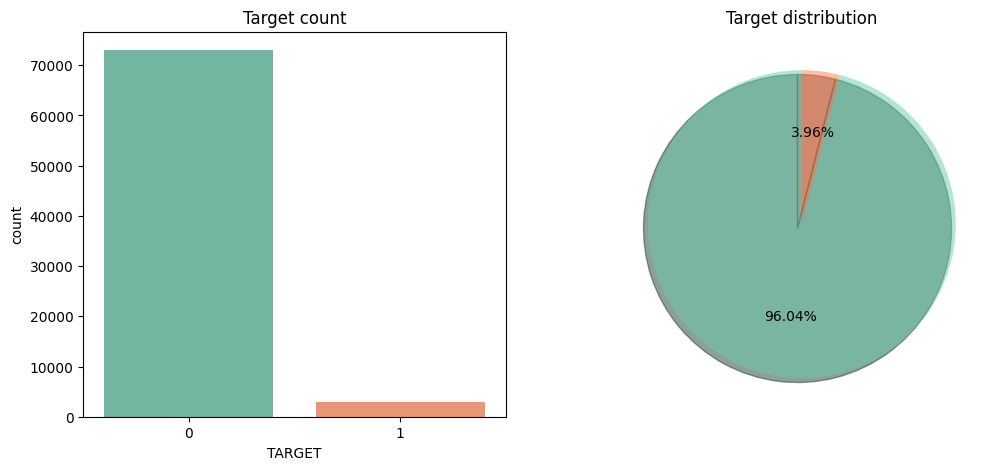

In [7]:
len_train = len(train)
target_0 = len(train.loc[train['TARGET']==0])/len_train
target_1 = 1-target_0

fig, axes = plt.subplots(1, 2, figsize=(12,5))

# TARGET distribution count
sns.countplot(x='TARGET', ax=axes[0], data=train, palette='Set2')
axes[0].set_title('Target count')

# TARGET distribution pie chart
axes[1].pie([target_0, target_1], colors=['mediumaquamarine', 'coral'], autopct='%1.2f%%', shadow=True, startangle=90, wedgeprops={'alpha':.5})
axes[1].set_title('Target distribution')
plt.savefig('target_counts.png')

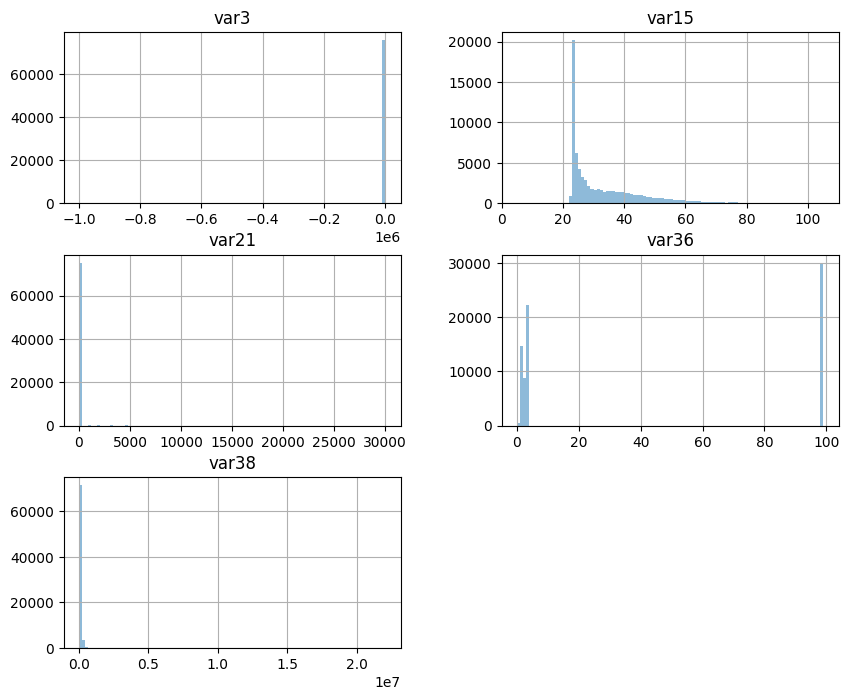

In [8]:
train[['var3','var15','var21','var36','var38']].hist(bins=100, figsize=(10, 8), alpha=0.5)
plt.savefig('var_columns_all.png')
plt.show()


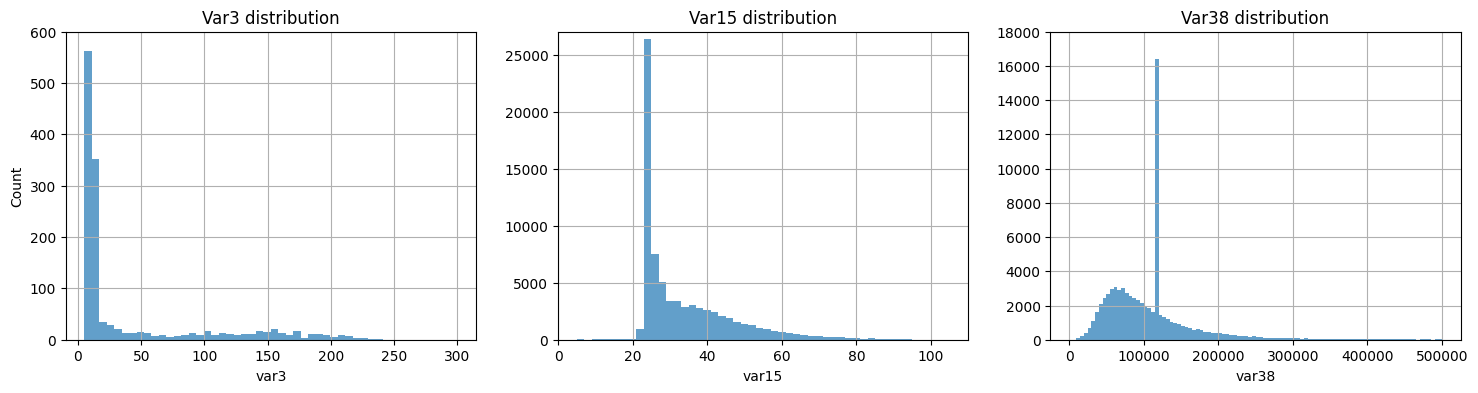

In [9]:
fig, ax = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(18,4))

train.loc[train.var3.between(5, 300), 'var3'].hist(bins=50, range=(5, 300), ax=ax[0], alpha=0.7)
ax[0].set_title("Var3 distribution")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("var3")
ax[0].set_ylim(0,600)

train.loc[train.var15.between(5, 105), 'var15'].hist(bins=50, range=(5, 105), ax=ax[1], alpha=0.7)
ax[1].set_title("Var15 distribution")
ax[1].set_xlabel("var15")
ax[1].set_ylim(0,27000)

train.var38.hist(bins=100, range=(0, 500000), ax=ax[2], alpha=0.7)
ax[2].set_title("Var38 distribution")
ax[2].set_xlabel("var38")
ax[2].set_ylim(0,18000)

plt.savefig('var3_15_38.png')
plt.show()

In [10]:
print("Var3")
print("Max: ", train['var3'].max())
print("Min: ", train['var3'].min())
print("Unique values: ", train['var3'].nunique())

print("\nVar15")
print("Max: ", train['var15'].max())
print("Min: ", train['var15'].min())
print("Unique values: ", train['var15'].nunique())

print("\nVar38")
print("Max: ", train['var38'].max())
print("Min: ", train['var38'].min())
print("Unique values: ", train['var38'].nunique())

Var3
Max:  238
Min:  -999999
Unique values:  208

Var15
Max:  105
Min:  5
Unique values:  100

Var38
Max:  22034738.76
Min:  5163.75
Unique values:  57736


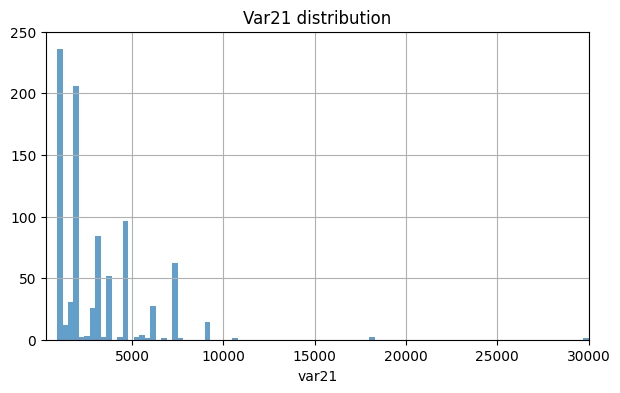

In [11]:
fig, ax = plt.subplots(1, 1, sharex=False, sharey=False, figsize=(7,4))
train.var21.hist(bins=100, range=(0, 30000), ax=ax, alpha=0.7)
ax.set_title("Var21 distribution")
ax.set_xlabel("var21")
ax.set_ylim(0,250)
ax.set_xlim(300,30000)
plt.savefig('var21_36.png')
plt.show()

In [12]:
print("Var21")
print("Max: ", train['var21'].max())
print("Min: ", train['var21'].min())
print("Unique values: ", train['var21'].nunique())
print("List of unique values: ", train['var21'].unique())

print("\nVar36")
print("Max: ", train['var36'].max())
print("Min: ", train['var36'].min())
print("Unique values: ", train['var36'].nunique())
print("List of unique values: ", train['var36'].unique())

Var21
Max:  30000
Min:  0
Unique values:  24
List of unique values:  [    0  9000  1800  4500  7200  2400  1200  2700   900  1500  3600  6000
 10500  3000  3300  7500  5100  6600  2100  5400 18000  5700  4200 30000]

Var36
Max:  99
Min:  0
Unique values:  5
List of unique values:  [99  3  2  1  0]


In [13]:
print("Number of mssing data in the dataset: ", train.isna().any().sum())

Number of mssing data in the dataset:  0


In [14]:
i=0
for col in train.columns: #reomving all features with null variance/zero variance
    if train[col].var()==0:
        i+=1
        print(col)
        del train[col]
        del test[col]
print("%i features were found to have zero variance and these were all removed."%(i))

ind_var2_0
ind_var2
ind_var27_0
ind_var28_0
ind_var28
ind_var27
ind_var41
ind_var46_0
ind_var46
num_var27_0
num_var28_0
num_var28
num_var27
num_var41
num_var46_0
num_var46
saldo_var28
saldo_var27
saldo_var41
saldo_var46
imp_amort_var18_hace3
imp_amort_var34_hace3
imp_reemb_var13_hace3
imp_reemb_var33_hace3
imp_trasp_var17_out_hace3
imp_trasp_var33_out_hace3
num_var2_0_ult1
num_var2_ult1
num_reemb_var13_hace3
num_reemb_var33_hace3
num_trasp_var17_out_hace3
num_trasp_var33_out_hace3
saldo_var2_ult1
saldo_medio_var13_medio_hace3
34 features were found to have zero variance and these were all removed.


In [15]:
i=0
for col in train.columns: #reomving all sparse features
    if np.percentile(train[col],99)==0:
        i+=1
        print(col)
        del train[col]
        del test[col]
print("%i features were found to be sparse and these were all removed."%(i))

imp_op_var40_comer_ult1
imp_op_var40_comer_ult3
imp_op_var40_efect_ult1
imp_op_var40_efect_ult3
imp_op_var40_ult1
imp_sal_var16_ult1
ind_var1
ind_var6_0
ind_var6
ind_var13_largo
ind_var13_medio_0
ind_var13_medio
ind_var14
ind_var17_0
ind_var17
ind_var18_0
ind_var18
ind_var19
ind_var20_0
ind_var20
ind_var29_0
ind_var29
ind_var31_0
ind_var31
ind_var32_cte
ind_var32_0
ind_var32
ind_var33_0
ind_var33
ind_var34_0
ind_var34
ind_var40
ind_var39
ind_var44_0
ind_var44
num_var1
num_var6_0
num_var6
num_var13_largo
num_var13_medio_0
num_var13_medio
num_var14
num_var17_0
num_var17
num_var18_0
num_var18
num_var20_0
num_var20
num_op_var40_hace2
num_op_var40_hace3
num_op_var40_ult1
num_op_var40_ult3
num_var29_0
num_var29
num_var31_0
num_var31
num_var32_0
num_var32
num_var33_0
num_var33
num_var34_0
num_var34
num_var40
num_var39
num_var44_0
num_var44
saldo_var1
saldo_var6
saldo_var13_largo
saldo_var13_medio
saldo_var14
saldo_var17
saldo_var18
saldo_var20
saldo_var29
saldo_var31
saldo_var32
saldo_var33
s

In [16]:
!pip install ipython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.7 MB/s eta 0:00:00


In [17]:
import itertools
import time

start_time = time.time()
combinations = list(itertools.combinations(train.columns,2))
remove=[]
for f1,f2 in combinations:
    if (f1 not in remove) & (f2 not in remove):
        if train[f1].equals(train[f2]):
            remove.append(f1)
train.drop(remove,axis=1,inplace=True)
test.drop(remove,axis=1,inplace=True)
print("%i were found to be duplicated columns and %i of these were removed."%(len(remove)*2,len(remove)))
print(remove)
del remove
del combinations
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

12 were found to be duplicated columns and 6 of these were removed.
['ind_var26_0', 'ind_var25_0', 'ind_var37_0', 'num_var26_0', 'num_var25_0', 'num_var37_0']
Execution time: 2.3036787509918213 seconds


In [18]:
train.shape,test.shape

((76020, 143), (75818, 142))

In [19]:
y = train['TARGET']
train.drop('TARGET', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(train,y, test_size=0.3, random_state=3)

X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.dropna(inplace=True)
y_train = y_train[X_train.index]

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(53214, 142) (22806, 142) (53214,) (22806,)


In [20]:
decisionTree = DecisionTreeClassifier()
decisionTree.fit(X_train, y_train)

y_predict_dt = decisionTree.predict(X_test)
accuracyDt = accuracy_score(y_test, y_predict_dt)

print("Accuracy with Decision Tree ", accuracyDt)

Accuracy with Decision Tree  0.9252389722002982


In [21]:
y_predict_dt = decisionTree.predict(test)
print(y_predict_dt.shape)

df_final = pd.DataFrame({
    'ID': test['ID'],
    'TARGET': y_predict_dt
})
df_final.to_csv("submission_decisiontree.csv", index=False)

print(df_final)

(75818,)
           ID  TARGET
0           2       0
1           5       0
2           6       0
3           7       0
4           9       0
...       ...     ...
75813  151831       0
75814  151832       0
75815  151833       0
75816  151834       0
75817  151837       0

[75818 rows x 2 columns]


In [22]:
print(test.shape)


(75818, 142)


Changing the parameters of the DecisionTreeClassifier

In [23]:
decisionTree_depth5 = DecisionTreeClassifier(max_depth=5, random_state=3)
decisionTree_depth5.fit(X_train, y_train)

y_predict_depth5 = decisionTree_depth5.predict(X_test)
accuracy_depth5 = accuracy_score(y_test, y_predict_depth5)
print("Accuracy with max_depth=5:", accuracy_depth5)

Accuracy with max_depth=5: 0.9604490046478997


In [24]:
y_predict_dt = decisionTree_depth5.predict(test)
print(y_predict_dt.shape)

df_final = pd.DataFrame({
    'ID': test['ID'],
    'TARGET': y_predict_dt
})
df_final.to_csv("submission_decisiontree1.csv", index=False)

print(df_final)

(75818,)
           ID  TARGET
0           2       0
1           5       0
2           6       0
3           7       0
4           9       0
...       ...     ...
75813  151831       0
75814  151832       0
75815  151833       0
75816  151834       0
75817  151837       0

[75818 rows x 2 columns]


In [25]:
decisionTree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=3)
decisionTree_entropy.fit(X_train, y_train)

y_predict_entropy = decisionTree_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_predict_entropy)
print("Accuracy with criterion='entropy':", accuracy_entropy)

Accuracy with criterion='entropy': 0.9270805928264492


In [26]:
y_predict_dt = decisionTree_entropy.predict(test)
print(y_predict_dt.shape)

df_final = pd.DataFrame({
    'ID': test['ID'],
    'TARGET': y_predict_dt
})
df_final.to_csv("submission_decisiontree2.csv", index=False)

print(df_final)

(75818,)
           ID  TARGET
0           2       0
1           5       0
2           6       0
3           7       0
4           9       0
...       ...     ...
75813  151831       0
75814  151832       1
75815  151833       0
75816  151834       0
75817  151837       0

[75818 rows x 2 columns]


In [27]:
decisionTree_leaf10 = DecisionTreeClassifier(max_leaf_nodes=10, random_state=3)
decisionTree_leaf10.fit(X_train, y_train)

y_predict_leaf10 = decisionTree_leaf10.predict(X_test)
accuracy_leaf10 = accuracy_score(y_test, y_predict_leaf10)
print("Accuracy with max_leaf_nodes=10:", accuracy_leaf10)

Accuracy with max_leaf_nodes=10: 0.9607120933087784


In [28]:
y_predict_dt = decisionTree_leaf10.predict(test)
print(y_predict_dt.shape)

df_final = pd.DataFrame({
    'ID': test['ID'],
    'TARGET': y_predict_dt
})
df_final.to_csv("submission_decisiontree3.csv", index=False)

print(df_final)

(75818,)
           ID  TARGET
0           2       0
1           5       0
2           6       0
3           7       0
4           9       0
...       ...     ...
75813  151831       0
75814  151832       0
75815  151833       0
75816  151834       0
75817  151837       0

[75818 rows x 2 columns]
